# Day 4 Pandas DataFrame Analysis

In [1]:
import pandas as pd

In [104]:
df = pd.read_csv("Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv")

In [105]:
df.head()

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,...,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,...,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,...,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,...,6755.31,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,...,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan


In [106]:
df.shape

(450, 26)

In [81]:
df.isnull().sum()

Company Name                                   0
company contact                                0
company email                                 17
company phone                                  0
Address                                        0
City                                           0
State                                          0
Postcode                                       0
Industry                                       0
Industry descr                                16
Company Type                                   0
Current fulltime                               4
Job created                                  439
Job retain                                   436
Effective Date                                 0
Total Savings                                  0
Savings from beginning receiving benefits      0
Borough                                        0
Latitude                                      41
Longitude                                     41
Community Board     

In [26]:
Companies = df.groupby("Company Name")["Company Name"].sum()

In [27]:
Companies.shape

(439,)

In [ ]:
# Question 1 

# 439 different companies are represented in the data set

# could also double check by converting all to upper or lower case

In [38]:
Jobs = df.groupby('Borough')['Job created'].sum()

In [39]:
Jobs

Borough
Bronx             22.0
Brooklyn          25.0
New York           0.0
Queens           102.0
Staten Island      0.0
Name: Job created, dtype: float64

In [ ]:
# Question 2

# 102 jobs were created for businesses in Queens

In [ ]:
# Question 3

In [111]:
df1 = df.copy()

df1 = df1 [['Company Name', 'company contact','company email']]

#This method doesnt
df1 = df1.dropna() #have to assign to a dataframe for this to work

#df1['domain'] = df1['company email'].apply(lambda x: x.split('@')[1])

#splits the email at '@' and takes the second part of the split index 1 (first part is index 0)

df1['domain'] = df1['company email'].str.split('@').str[1]


In [112]:
df1.shape

(433, 4)

In [117]:
Domains = df1.groupby('domain')['domain'].nunique()

In [119]:
Domains.shape

(356,)

In [ ]:
# Question 3,there are 356 Unique Domains used

In [79]:
df1

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,domain
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,...,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood,energyspec.com
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,...,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy,NaN
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,...,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan,NaN
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,...,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West,industrycity.com
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,...,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan,silvprop.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,"WONTON FOOD, INC.",DONALD LAU,donaldlau@wontonfood.com,7186286868,220-222 MOORE STREET,Brooklyn,NY,11206,Manufacturing,"MFG. PASTA, EGGROLL SKINS",...,Brooklyn,40.704425,-73.936010,301.0,34.0,485.0,3071539.0,3.031090e+09,Bushwick South,wontonfood.com
446,Wood Works,Gordon Brawm,brawnworks@gmail.com,9179404950,162 Cook Street,Brooklyn,NY,11206,Manufacturing,Installer of wood furniture,...,Brooklyn,40.702869,-73.936466,301.0,34.0,485.0,3071625.0,3.031230e+09,Bushwick South,gmail.com
447,"WorldWide Plumbing Supply, Inc.",Surie Lefkowitz,sheidya@wwps.com,7188533002,125 Lake Avenue,Staten Island,NY,10303,Manufacturing,"Plumbing Fixtures, Parts & Supplies, Plumbers",...,Staten Island,40.633518,-74.150942,501.0,49.0,239.0,5107122.0,5.011610e+09,Mariner's Harbor-Arlington-Port Ivory-Granitev...,wwps.com
448,WUD Furniture LLC,Keren Springer,keren@wudfurniture.com,7184867952,1102 Atlantic Avenue,Brooklyn,NY,11238,Manufacturing,"We make handcrafted furniture, surfaces, lighting",...,Brooklyn,40.679518,-73.956819,308.0,35.0,305.0,3027572.0,3.011260e+09,Crown Heights North,wudfurniture.com


In [174]:
NTA = df.groupby('NTA')[['Company Name','Savings from beginning receiving benefits', 'Job created' ]].sum()

In [175]:
NTA

,Savings from beginning receiving benefits,Job created
NTA,,
Astoria,428477.24,0.0
Baisley Park,133609.60,0.0
Battery Park City-Lower Manhattan,34183361.15,0.0
Bedford,578585.41,0.0
Bensonhurst West,89379.70,0.0
...,...,...
Whitestone,1600972.12,10.0
Williamsburg,162678.47,0.0
Windsor Terrace,627202.14,0.0


In [176]:
NTA2 = df.groupby('NTA')['Company Name'].nunique()

In [177]:
NTA_over_5 = NTA2[NTA2>5]

In [178]:
NTA_over_5

NTA
Battery Park City-Lower Manhattan                    9
Bushwick South                                      10
Carroll Gardens-Columbia Street-Red Hook            11
College Point                                        7
Crown Heights North                                  9
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill    10
East New York                                        7
East Williamsburg                                   11
Greenpoint                                          14
Hunters Point-Sunnyside-West Maspeth                72
Hunts Point                                         13
Manhattanville                                       9
Maspeth                                              9
Mott Haven-Port Morris                              14
Queensbridge-Ravenswood-Long Island City            15
Steinway                                             7
Sunset Park West                                    48
park-cemetery-etc-Brooklyn                          15
Name: 

In [179]:
NTA = NTA.loc[NTA_over_5.index]

In [180]:
NTA['NumberCompanies']= NTA_over_5.values

In [185]:
NTA['Average Total Savings'] = NTA['Savings from beginning receiving benefits']/NTA['NumberCompanies']

In [186]:
# Question Number 4

NTA.reset_index()

,NTA,Savings from beginning receiving benefits,Job created,NumberCompanies,Average Total Savings
0,Battery Park City-Lower Manhattan,34183361.15,0.0,9,3.798151e+06
1,Bushwick South,3078000.31,10.0,10,3.078000e+05
2,Carroll Gardens-Columbia Street-Red Hook,2031523.40,0.0,11,1.846839e+05
3,College Point,4019755.66,2.0,7,5.742508e+05
4,Crown Heights North,154520.70,0.0,9,1.716897e+04
5,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,4373905.00,0.0,10,4.373905e+05
6,East New York,4121508.61,15.0,7,5.887869e+05
7,East Williamsburg,1577064.27,0.0,11,1.433695e+05
8,Greenpoint,2481108.82,0.0,14,1.772221e+05
9,Hunters Point-Sunnyside-West Maspeth,12045698.97,0.0,72,1.673014e+05


In [188]:
NTA.to_csv('TDI_Onboarding_Day4.csv')

# Day 5 Plotting 

In [189]:
import matplotlib.pyplot as plt 

Text(0.5, 1.0, 'Day 5 Scatter Plot')

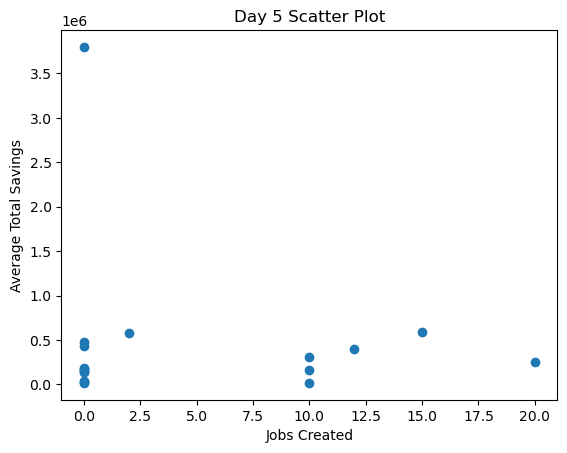

In [195]:
plt.scatter(NTA['Job created'], NTA['Average Total Savings'])
plt.xlabel('Jobs Created')
plt.ylabel('Average Total Savings')
plt.title('Day 5 Scatter Plot')

In [201]:
import numpy as np


Text(0.5, 1.0, 'Day 5 Histogram')

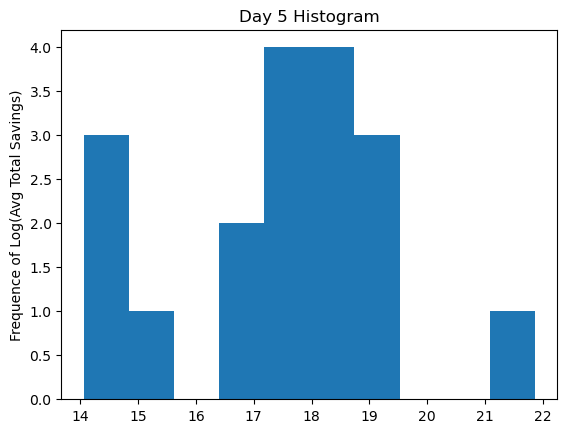

In [204]:
plt.hist(np.log2(NTA['Average Total Savings']))
plt.ylabel('Frequence of Log(Avg Total Savings)')
plt.title('Day 5 Histogram')

In [205]:
NTA['Jobspermonth_estimate'] = NTA['Job created']/10.266

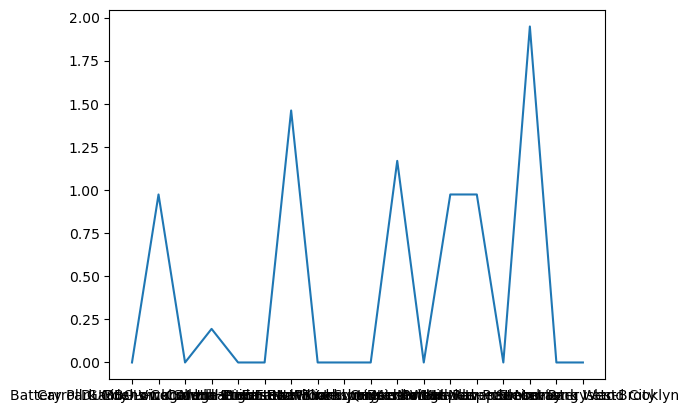